#### Introduction to Random mumber generation with computers

##### Von Neumann's [middle-square method](https://en.wikipedia.org/wiki/Middle-square_method) 

In [ ]:

# the seed must come from outside, be unrelated.
# this is Alberto's street number
seed = 47

# let's generate a fixed quantity of samples

SAMPLES = 100

# initialise the seed
# which won't be revealed
trailer = seed

for _ in range(SAMPLES): 
    
    new_value = trailer**2
    
    # a string can be indexed
    string_version = str(new_value)
    
    # print the central digits
    print(string_version[1 : 3])

    # Original: use the output as the new seed      
    #trailer = int(string_version[1 : 3])
    
    # MOD: use the integer corresponding to the last 4 digits      
    trailer = int(string_version[-4 : ])


#### Issues with random

We are using *deterministic* machinery to generate values that are valuable only because they are non-deterministic.

The issue of *periodicity*: if a number is ever repeated, the output will be deterministic from there on

### Random-number generation in Python 

```bash
pip install random
```

Thanks to the *random* module we don't have to worry about bias in  data sampling!

#### Computers play games

Fix N to be the largest possible integer. 

With [Lotto](https://en.wikipedia.org/wiki/Lottery) and [Tombola](https://en.wikipedia.org/wiki/Tombola_(game)) games this is often set to 90. 

Potential problem: a number could come up twice. Or never.

See how ``random`` supports extractions without replacement.

In [ ]:
import random as rand

N = 90

for _ in range(SAMPLES):
    print(int(rand.random()*N))

### Sampling with/without replacement

### Olivetti faces with Gaussian noise

In [23]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt

In [24]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
dir(faces)

['DESCR', 'data', 'images', 'target']

In [49]:
olivetti_images = faces.images
image = None

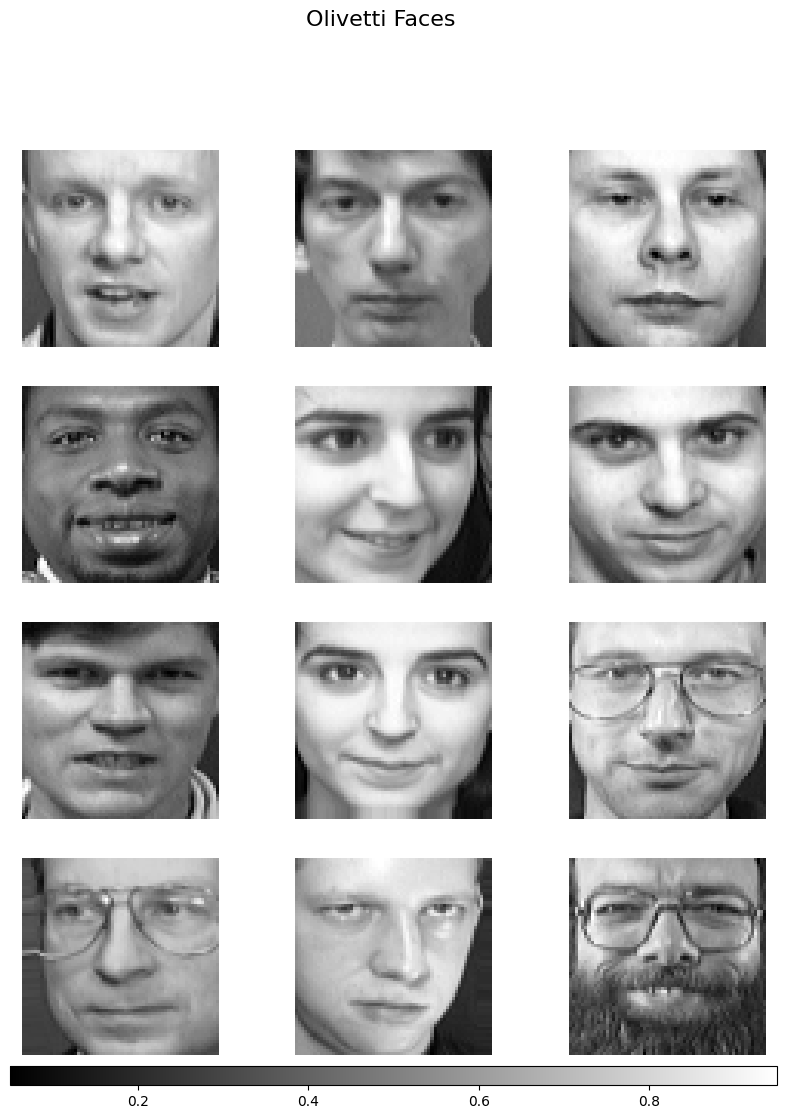

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 14))

for ax, img in zip(axes.flat, olivetti_images):
    v_max = max(img.max(), -img.min())
    image = ax.imshow(img, cmap="gray")
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle("Olivetti Faces", size=16)
    ax.axis("off")

if image is not None:
    fig.colorbar(image, ax=axes, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()

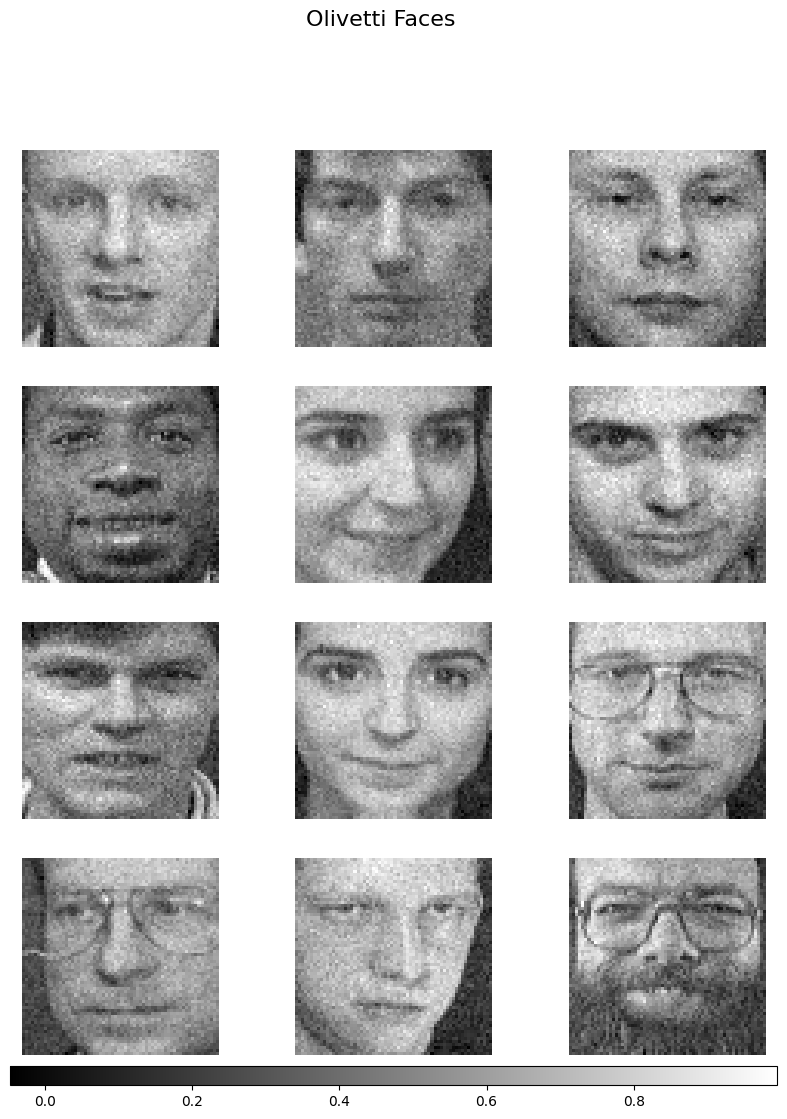

In [57]:
mean = 0.0
std = 0.05

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 14))

for ax, img in zip(axes.flat, olivetti_images):
    v_max = max(img.max(), -img.min())
    image = img + np.random.normal(loc=mean, scale=std, size=(64, 64))
    image = ax.imshow(image, cmap="gray")
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle("Olivetti Faces", size=16)
    ax.axis("off")

if image is not None:
    fig.colorbar(image, ax=axes, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
plt.show()